# Effective Volume

### In this notebook a preliminary effective volume will be determined

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Data

The data is simulated in two different circumstances, one where it mimics the conditions in Pylos, and one where Tanganyika is simulated. For Tanganyika the neutrinos can travel 17.5 km, in Pylos only 15 km. Additionally the water depth at Pylos is 4000 meters and at Tanganyika only 1500 m. For both simulations the square detector is used as the performance of the cylinder is comparable.

First import the data for Pylos with the square configuration, so LocID = 2.

In [51]:
energy_P = []
azimuth_P = []
zenith_P = []
location_P = []
flags_P = []

with open('Pylos_Extended.txt', 'r') as file:
    lines = file.readlines()

# Assuming each entry spans 5 lines: a scalar, azimuth, zenith, a vector, and a flag
for i in range(0, len(lines), 5):
    scalar = lines[i].strip()
    azimuth = lines[i + 1].strip()
    zenith = lines[i + 2].strip()
    vector = lines[i + 3].strip()
    flag = lines[i + 4].strip()
    
    # Convert the scalar and flag to float and int, respectively
    # For the vector, strip the brackets, split by commas, and convert to floats
    scalar = float(scalar.strip('[]'))
    vector = [float(num) for num in vector.strip('[]').split(',')]
    flag = int(flag)
    
    # Append to their respective lists
    energy_P.append(scalar)
    azimuth_P.append(float(azimuth))
    zenith_P.append(float(zenith))
    location_P.append(vector)
    flags_P.append(flag)

print(f"From the {len(flags_P)} simulated events a total of {np.sum(flags_P)} reached the detector and gave a signal.")

From the 500000 simulated events a total of 20349 reached the detector and gave a signal.


Then import the data from the Tanganyika.txt file.

In [59]:
energy_T = []
azimuth_T = []
zenith_T = []
location_T = []
flags_T = []

with open('Tanganyika_Extended.txt', 'r') as file:
    lines = file.readlines()

# Assuming each entry spans 5 lines: a scalar, azimuth, zenith, a vector, and a flag
for i in range(0, len(lines), 5):
    scalar = lines[i].strip()
    azimuth = lines[i + 1].strip()
    zenith = lines[i + 2].strip()
    vector = lines[i + 3].strip()
    flag = lines[i + 4].strip()
    
    # Convert the scalar and flag to float and int, respectively
    # For the vector, strip the brackets, split by commas, and convert to floats
    scalar = float(scalar.strip('[]'))
    vector = [float(num) for num in vector.strip('[]').split(',')]
    flag = int(flag)
    
    # Append to their respective lists
    energy_T.append(scalar)
    azimuth_T.append(float(azimuth))
    zenith_T.append(float(zenith))
    location_T.append(vector)
    flags_T.append(flag)

print(f"From the {len(flags_T)} simulated events a total of {np.sum(flags_T)} reached the detector and gave a signal.")

From the 850000 simulated events a total of 39399 reached the detector and gave a signal.


## Pylos

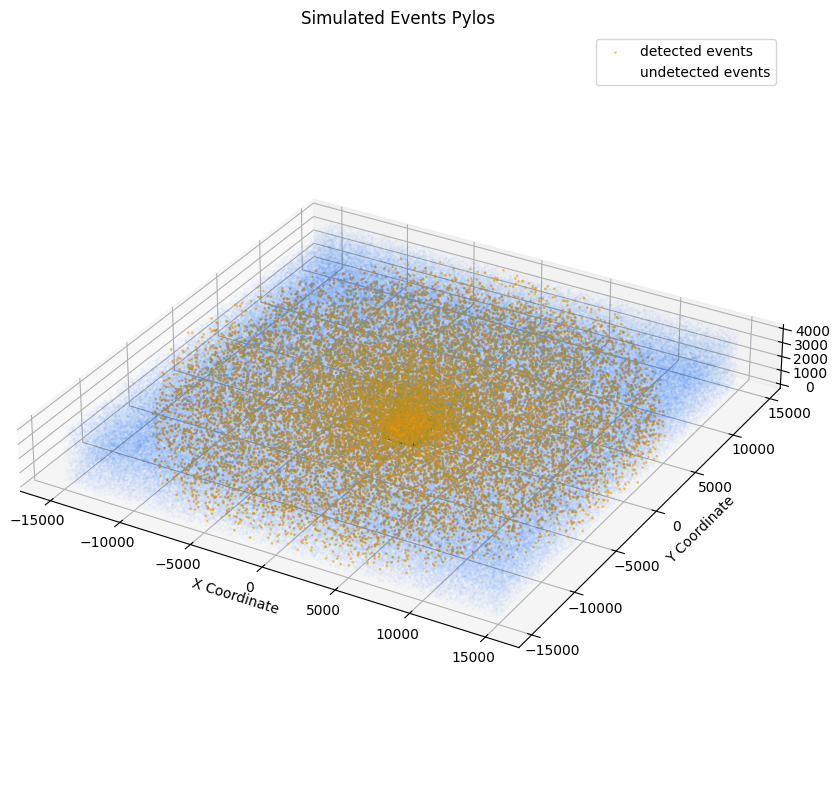

In [52]:
# Create a cube centered at the origin with side length 2
side_length = 2000
cube_coords = np.array([[1, 1, 1],
                        [1, 1, 0],
                        [1, -1, 1],
                        [1, -1, 0],
                        [-1, 1, 1],
                        [-1, 1, 0],
                        [-1, -1, 1],
                        [-1, -1, 0]]) * side_length / 2

# Define the vertices of the cube
cube_vertices = [
    [cube_coords[0], cube_coords[1], cube_coords[3], cube_coords[2], cube_coords[0]],
    [cube_coords[4], cube_coords[5], cube_coords[7], cube_coords[6], cube_coords[4]],
    [cube_coords[0], cube_coords[1], cube_coords[5], cube_coords[4], cube_coords[0]],
    [cube_coords[2], cube_coords[3], cube_coords[7], cube_coords[6], cube_coords[2]],
    [cube_coords[1], cube_coords[3], cube_coords[7], cube_coords[5], cube_coords[1]],
    [cube_coords[0], cube_coords[2], cube_coords[6], cube_coords[4], cube_coords[0]]
]

# Convert cube vertices to numpy array
cube_vertices = np.array(cube_vertices)


# Plot the location of the events
# Unzip the location_2 list into three lists for x, y, and z coordinates
detected_location_P = [location for location, flag in zip(location_P, flags_P) if flag == 1]
undetected_location_P = [location for location, flag in zip(location_P, flags_P) if flag == 0]

x_coords, y_coords, z_coords = zip(*detected_location_P)
z_coords = [i + 500 for i in z_coords]
unx_coords, uny_coords, unz_coords = zip(*undetected_location_P)
unz_coords = [i + 500 for i in unz_coords]

# Create a new figure for 3D plotting
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111, projection='3d')
  
# Scatter plot for 3D data
sc = ax.scatter(x_coords, y_coords, z_coords, s=1, alpha=0.5, color='orange', label='detected events')
sc1 = ax.scatter(unx_coords, uny_coords, unz_coords, s=1, alpha=0.01, color='dodgerblue', label='undetected events')

# Plot the cube
for vertices in cube_vertices:
    ax.plot(vertices[:,0], vertices[:,1], vertices[:,2], color='black')
    
# Set labels for axes
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
#ax.set_zlabel('Z Coordinate')
ax.set_ylim(-15800, 15800)
ax.set_box_aspect([30,30,4])
ax.set_zticks([0, 1000, 2000, 3000, 4000])

# Title for your plot
plt.title('Simulated Events Pylos')
plt.legend()

# Show plot
plt.show()

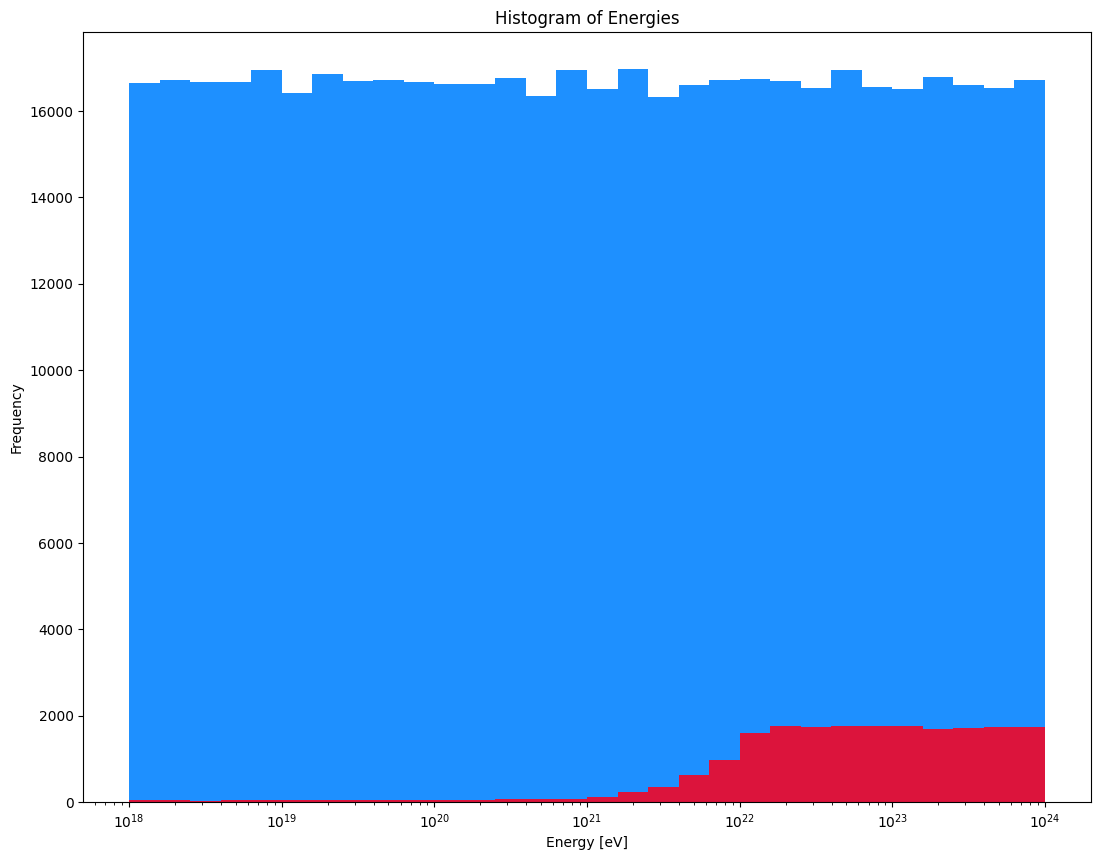

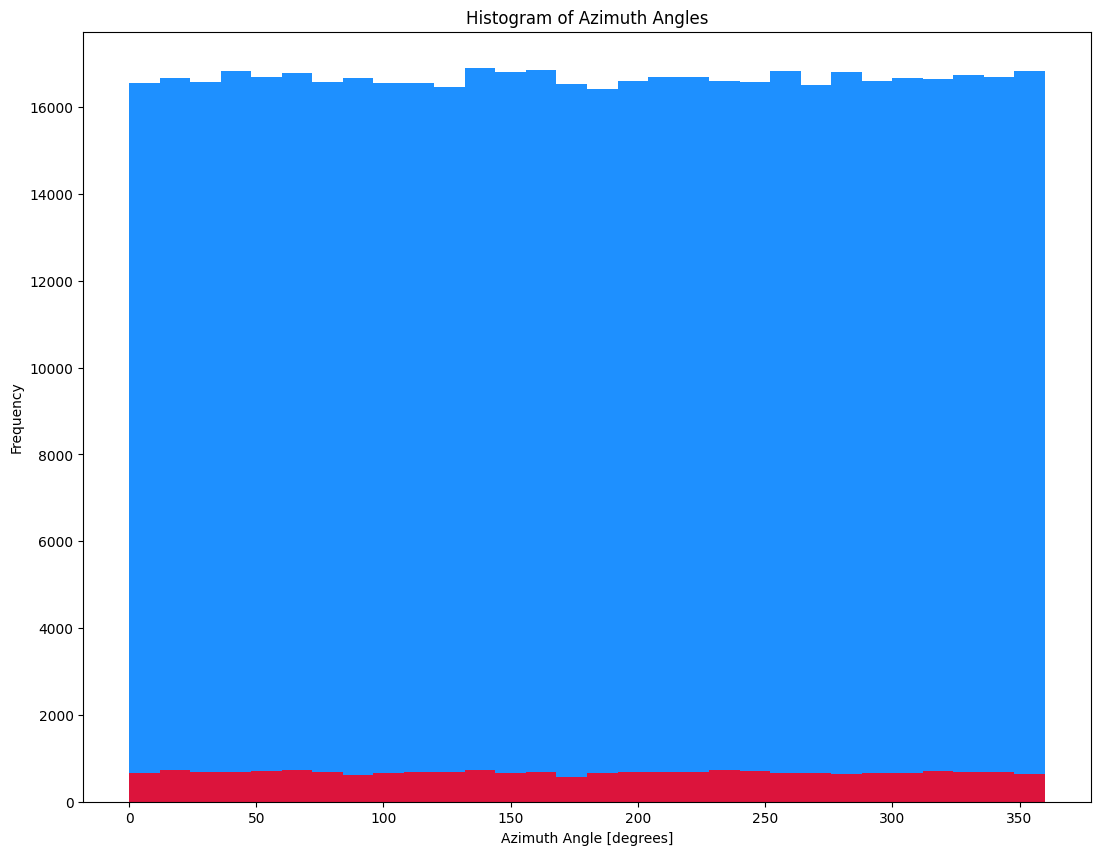

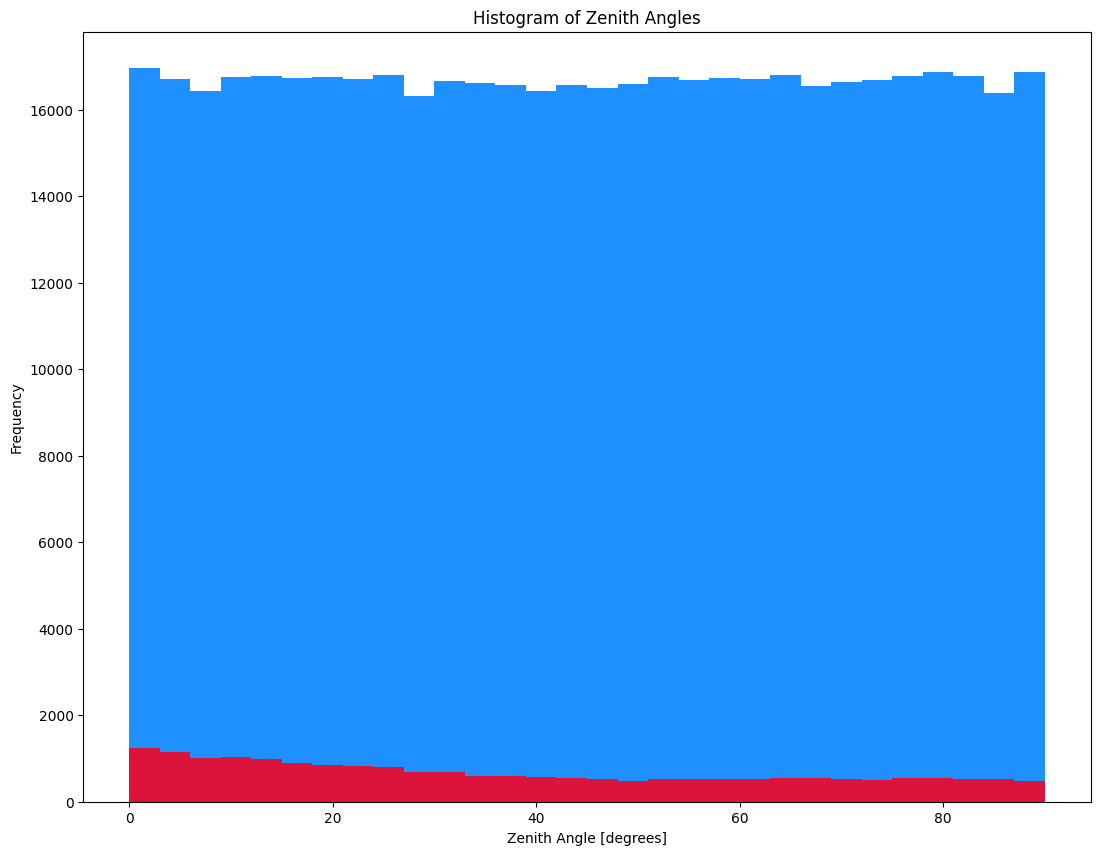

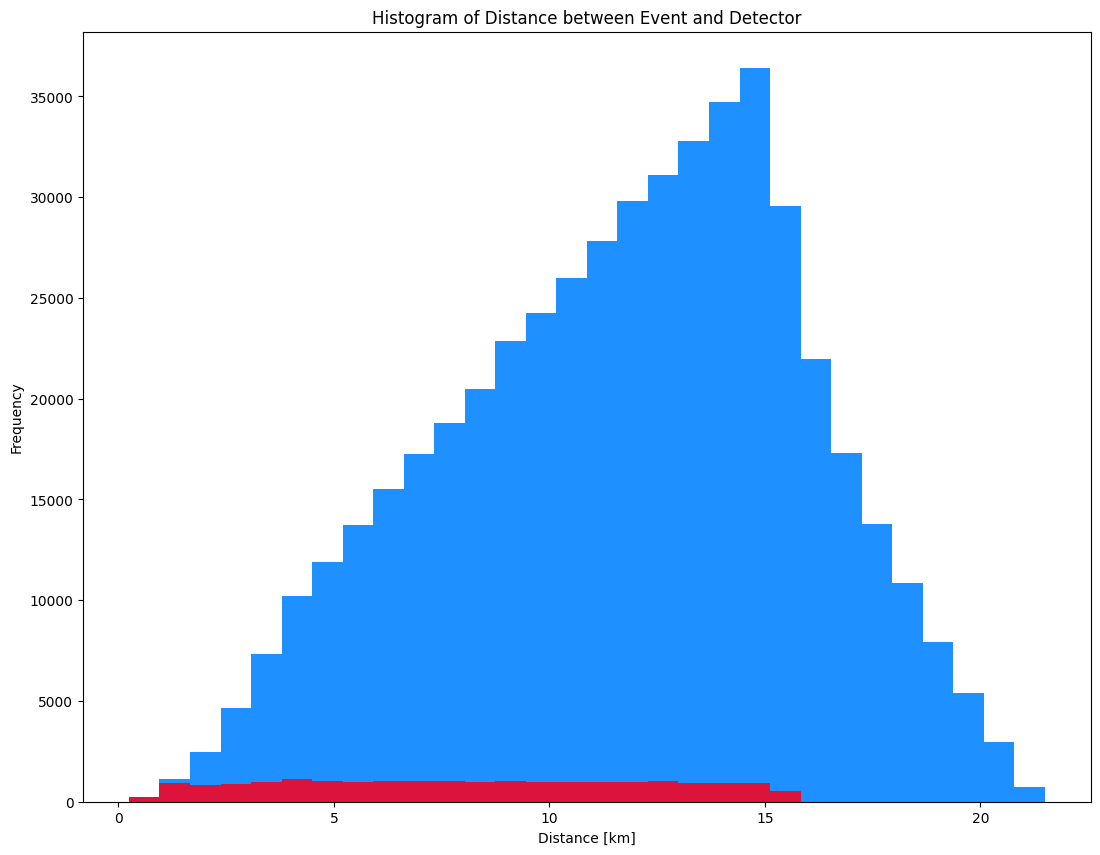

The volume of the can volume is 3600 km3.


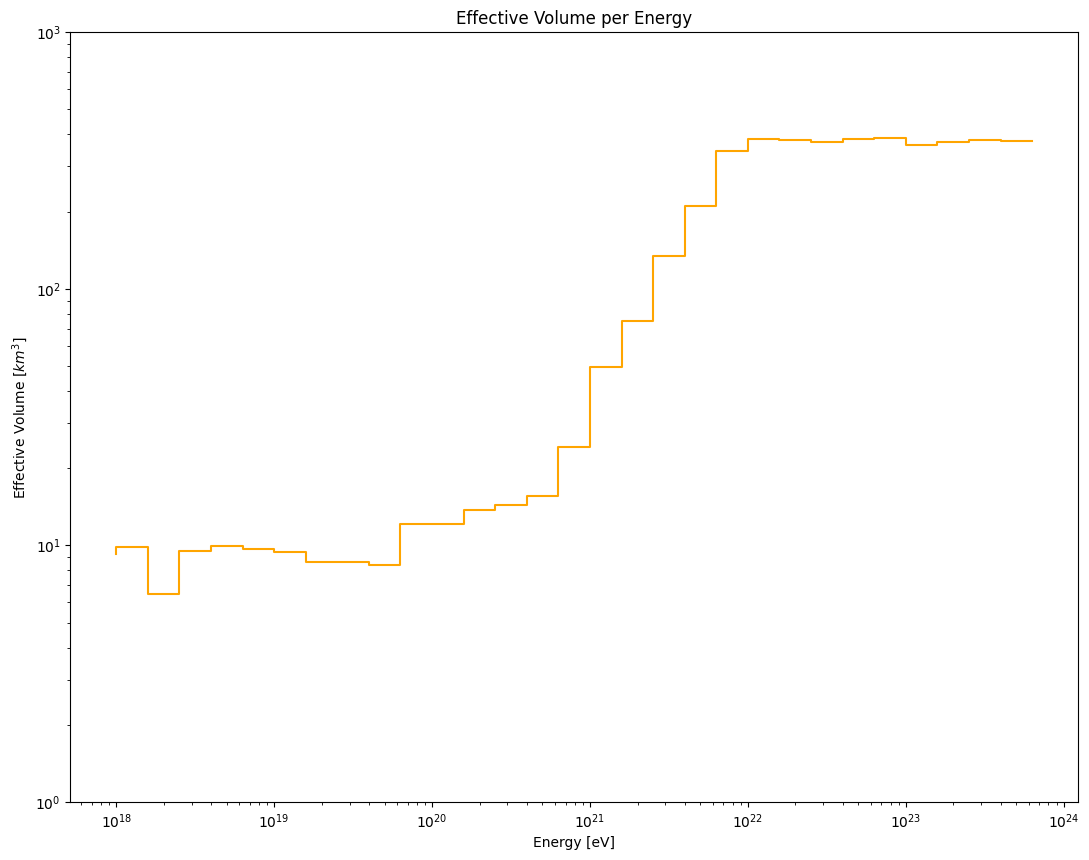

[  9.29618064   9.90312164   6.4798704    9.50780312   9.98583569
   9.6444228    9.3966898    8.62430377   8.61914168   8.4197901
  12.1299639   12.13215382  13.73963862  14.31893281  15.51449318
  24.21524664  49.62592047  74.75650842 134.6746988  210.53513708
 345.70319498 382.22648063 378.62632375 374.14179545 384.30756211
 386.4148202  364.89095459 373.53579176 379.8075177  376.86187713]


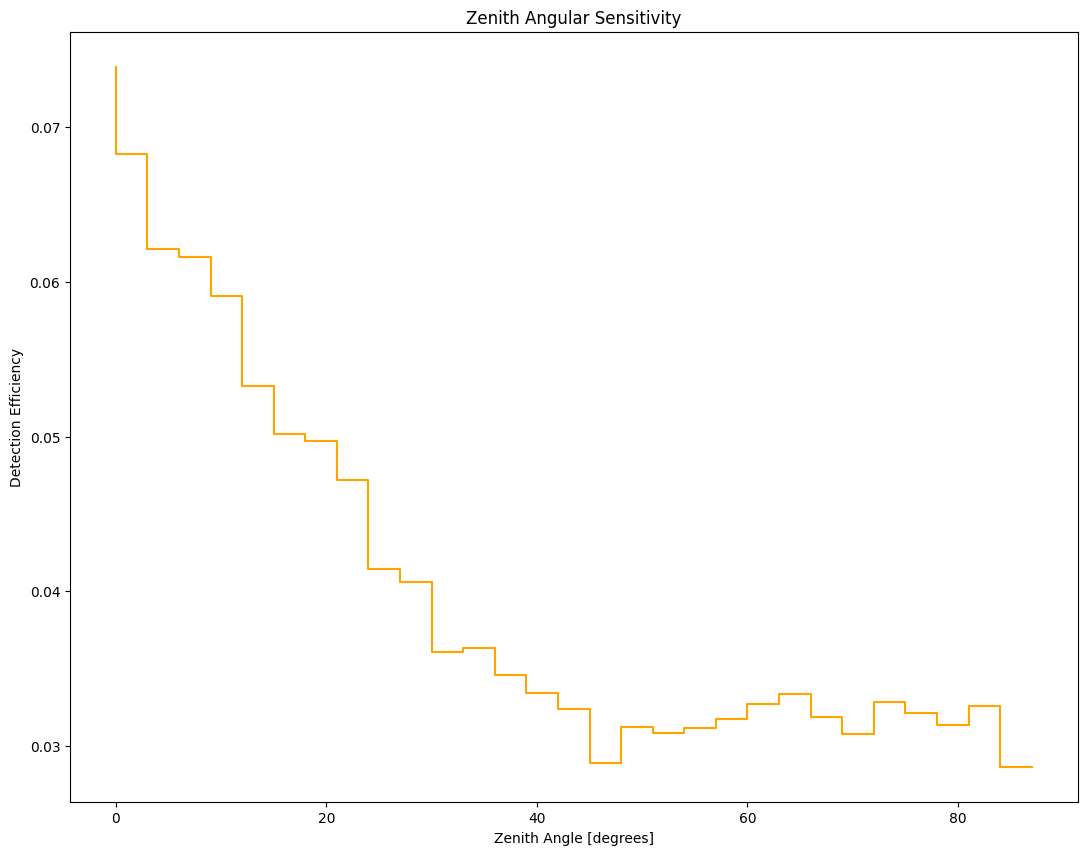

1.2202621833380558


In [147]:
log_min_energy = 18
log_max_energy = 24

# Filter out the energy values that have been detected so have flag ==1
detected_energy_P = [energy for energy, flag in zip(energy_P, flags_P) if flag == 1]

# Define the bin edges equally spaced in log space
log_bin_edges = np.linspace(log_min_energy, log_max_energy, 31)

# Transform the bin edges back to linear scale
linear_bin_edges = 10**log_bin_edges

# Plot the histogram
plt.figure(figsize=(13, 10))
plt.hist(energy_P, bins=linear_bin_edges, color='dodgerblue')
hist = plt.hist(detected_energy_P, bins=linear_bin_edges, color='crimson')

plt.xscale('log')
plt.xlabel('Energy [eV]')
plt.ylabel('Frequency')
plt.title('Histogram of Energies')
plt.show()


# Define the bin edges equally
bin_edges_azimuth = np.linspace(np.min(azimuth_P), np.max(azimuth_P), 31)
bin_edges_zenith = np.linspace(np.min(zenith_P), np.max(zenith_P), 31)

# Filter out the azimuth and zenith values that have been detected so have flag ==1
detected_azimuth_P = [azimuth for azimuth, flag in zip(azimuth_P, flags_P) if flag == 1]
detected_zenith_P = [zenith for zenith, flag in zip(zenith_P, flags_P) if flag == 1]

# Plot the histogram
plt.figure(figsize=(13, 10))
plt.hist(azimuth_P, bins=bin_edges_azimuth, color='dodgerblue')
plt.hist(detected_azimuth_P, bins=bin_edges_azimuth, color='crimson')
plt.xlabel('Azimuth Angle [degrees]')
plt.ylabel('Frequency')
plt.title('Histogram of Azimuth Angles')
plt.show()

# Plot the histogram
plt.figure(figsize=(13, 10))
plt.hist(zenith_P, bins=bin_edges_zenith, color='dodgerblue')
plt.hist(detected_zenith_P, bins=bin_edges_zenith, color='crimson')
plt.xlabel('Zenith Angle [degrees]')
plt.ylabel('Frequency')
plt.title('Histogram of Zenith Angles')
plt.show()

# Calculate the distance between the event and the centre of the detector
x_c, y_c, z_c = zip(*location_P)
z_c = [i + 500 for i in z_c]

distance_P = [np.sqrt((x**2 + y**2 + z**2)) / 1000 for x, y, z in zip(x_c, y_c, z_c)]
detected_distance_P = [distance for distance, flag in zip(distance_P, flags_P) if flag == 1]

# determine bin edges
bin_edges_distance = np.linspace(np.min(distance_P), np.max(distance_P), 31)

# Plot the histogram
plt.figure(figsize=(13, 10))
plt.hist(distance_P, bins=bin_edges_distance, color='dodgerblue')
plt.hist(detected_distance_P, bins=bin_edges_distance, color='crimson')
plt.xlabel('Distance [km]')
plt.ylabel('Frequency')
plt.title('Histogram of Distance between Event and Detector')
plt.show()

###################################### Now try to calculate the effective volume ###############################################

# Calculate the histograms using numpy.histogram
hist_all_P, _ = np.histogram(energy_P, bins=linear_bin_edges)
hist_detected_P, _ = np.histogram(detected_energy_P, bins=linear_bin_edges)

# Ensure you avoid division by zero
division_result_P = np.divide(hist_detected_P, hist_all_P, where=hist_all_P!=0)

# Calculate the generation volume which is a square
Rgen = 15                          # km
Hgen = 4                           # km
Vgen = (2 * Rgen)**2 * Hgen
print(f"The volume of the can volume is {round(Vgen)} km3.")

# Calculate the effective volume
Veff_P = division_result_P * Vgen

# Plot the Veff
plt.figure(figsize=(13, 10))
plt.step(linear_bin_edges[:-1], Veff_P, linestyle='-', color='orange')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1, 10**3)
plt.xlabel('Energy [eV]')
plt.ylabel('Effective Volume [$km^3$]')
plt.title('Effective Volume per Energy')
plt.show()

print(Veff_P)

###################################### Now try to calculate the Angular Sensitivity ###########################################

# Calculate the histograms using numpy.histogram
zenith_hist_all_P, _ = np.histogram(zenith_P, bins=bin_edges_zenith)
zenith_hist_detected_P, _ = np.histogram(detected_zenith_P, bins=bin_edges_zenith)

# Ensure you avoid division by zero
zenith_division_result_P = np.divide(zenith_hist_detected_P, zenith_hist_all_P, where=zenith_hist_all_P!=0)

# Plot the Angular Dependence
plt.figure(figsize=(13, 10))
plt.step(bin_edges_zenith[:-1], zenith_division_result_P, linestyle='-', color='orange')
plt.xlabel('Zenith Angle [degrees]')
plt.ylabel('Detection Efficiency')
plt.title('Zenith Angular Sensitivity')
plt.show()

print(sum(zenith_division_result_P))

## Tanganyika

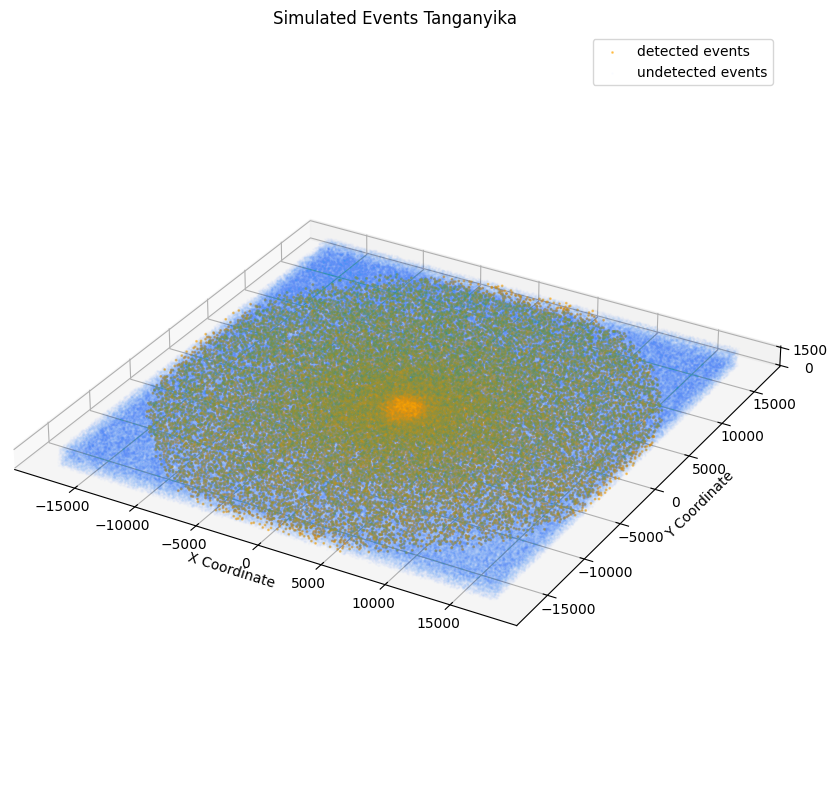

In [60]:
# Create a cube centered at the origin with side length 2
side_length = 2000
cube_coords = np.array([[1, 1, 1],
                        [1, 1, 0],
                        [1, -1, 1],
                        [1, -1, 0],
                        [-1, 1, 1],
                        [-1, 1, 0],
                        [-1, -1, 1],
                        [-1, -1, 0]]) * side_length / 2

# Define the vertices of the cube
cube_vertices = [
    [cube_coords[0], cube_coords[1], cube_coords[3], cube_coords[2], cube_coords[0]],
    [cube_coords[4], cube_coords[5], cube_coords[7], cube_coords[6], cube_coords[4]],
    [cube_coords[0], cube_coords[1], cube_coords[5], cube_coords[4], cube_coords[0]],
    [cube_coords[2], cube_coords[3], cube_coords[7], cube_coords[6], cube_coords[2]],
    [cube_coords[1], cube_coords[3], cube_coords[7], cube_coords[5], cube_coords[1]],
    [cube_coords[0], cube_coords[2], cube_coords[6], cube_coords[4], cube_coords[0]]
]

# Convert cube vertices to numpy array
cube_vertices = np.array(cube_vertices)


# Plot the location of the events
# Unzip the location_2 list into three lists for x, y, and z coordinates
detected_location_T = [location for location, flag in zip(location_T, flags_T) if flag == 1]
undetected_location_T = [location for location, flag in zip(location_T, flags_T) if flag == 0]

x_coords, y_coords, z_coords = zip(*detected_location_T)
z_coords = [i + 500 for i in z_coords]
unx_coords, uny_coords, unz_coords = zip(*undetected_location_T)
unz_coords = [i + 500 for i in unz_coords]

# Create a new figure for 3D plotting
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111, projection='3d')
  
# Scatter plot for 3D data
sc = ax.scatter(x_coords, y_coords, z_coords, s=1, alpha=0.5, color='orange', label='detected events')
sc1 = ax.scatter(unx_coords, uny_coords, unz_coords, s=1, alpha=0.01, color='dodgerblue', label='undetected events')

# Plot the cube
for vertices in cube_vertices:
    ax.plot(vertices[:,0], vertices[:,1], vertices[:,2], color='black')
    
# Set labels for axes
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
#ax.set_zlabel('Z Coordinate')
ax.set_ylim(-18300, 18300)
ax.set_box_aspect([35,35,1.5])
ax.set_zticks([0, 1500])

# Title for your plot
plt.title('Simulated Events Tanganyika')
plt.legend()

# Show plot
plt.show()

[1.00000000e+18 1.58489319e+18 2.51188643e+18 3.98107171e+18
 6.30957344e+18 1.00000000e+19 1.58489319e+19 2.51188643e+19
 3.98107171e+19 6.30957344e+19 1.00000000e+20 1.58489319e+20
 2.51188643e+20 3.98107171e+20 6.30957344e+20 1.00000000e+21
 1.58489319e+21 2.51188643e+21 3.98107171e+21 6.30957344e+21
 1.00000000e+22 1.58489319e+22 2.51188643e+22 3.98107171e+22
 6.30957344e+22 1.00000000e+23 1.58489319e+23 2.51188643e+23
 3.98107171e+23 6.30957344e+23 1.00000000e+24]


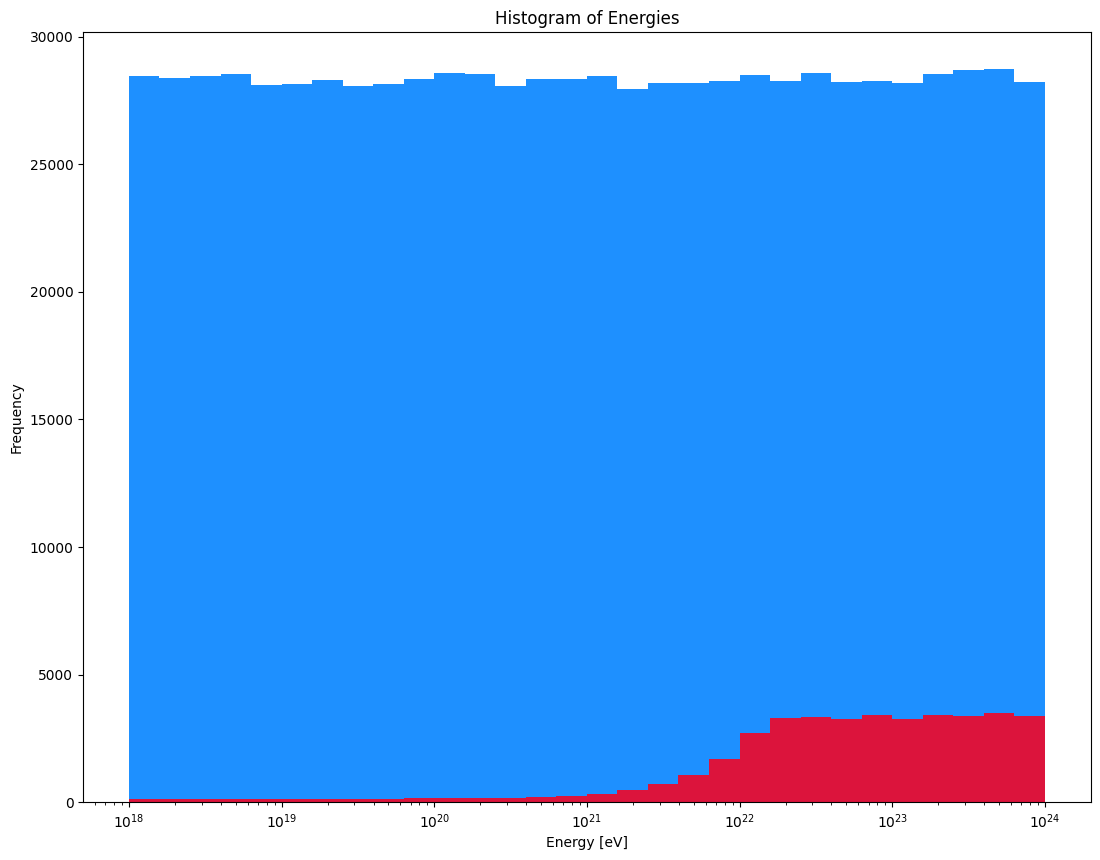

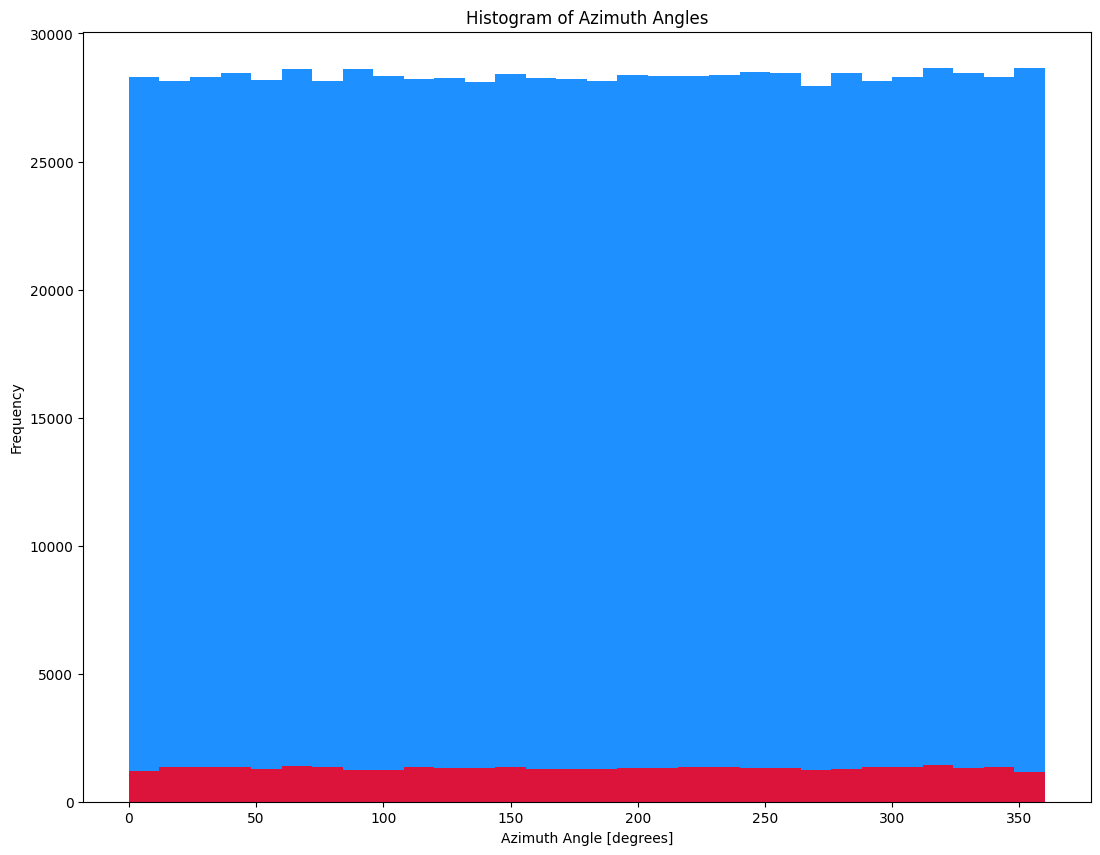

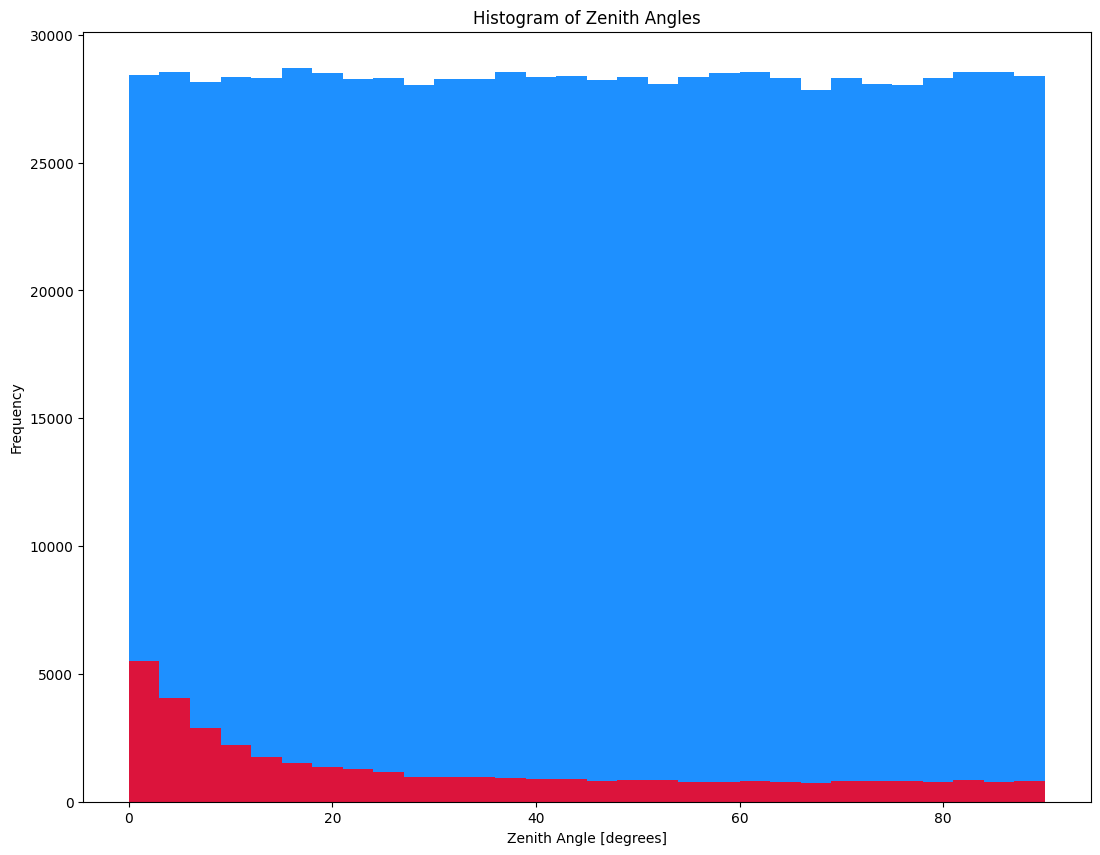

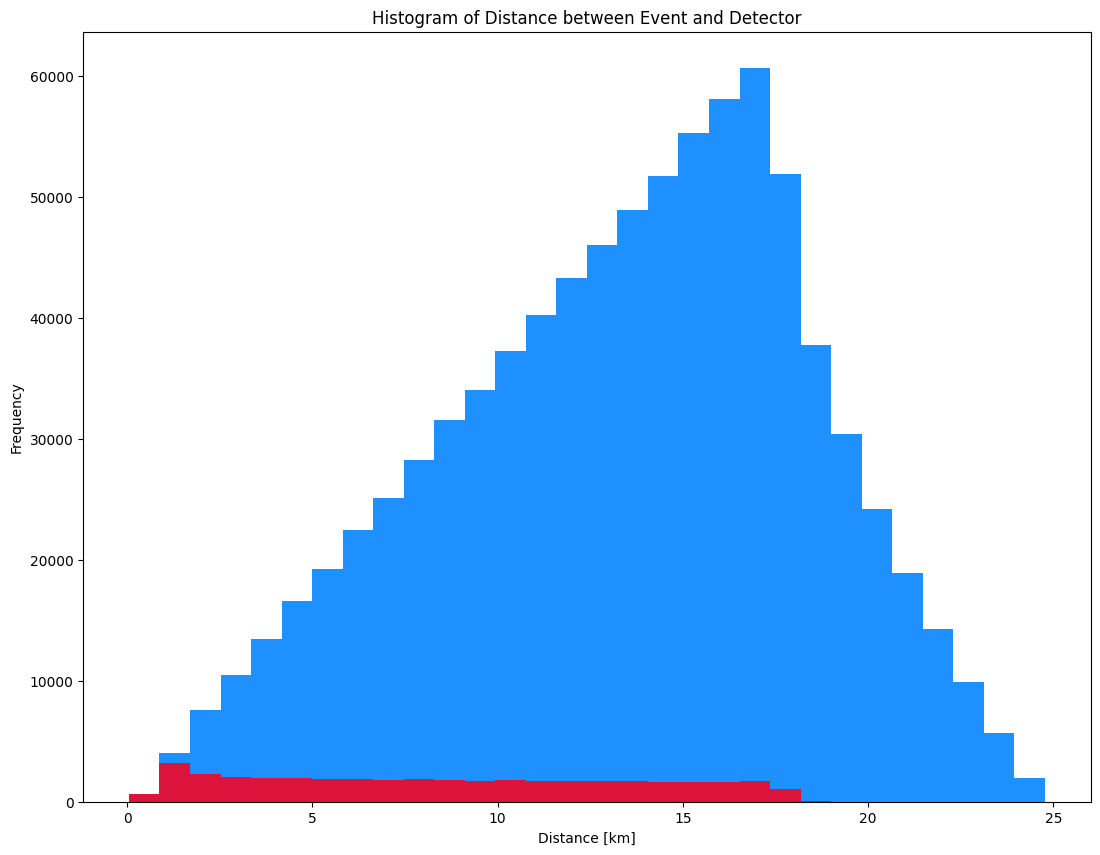

The volume of the can volume is 1838 km3.


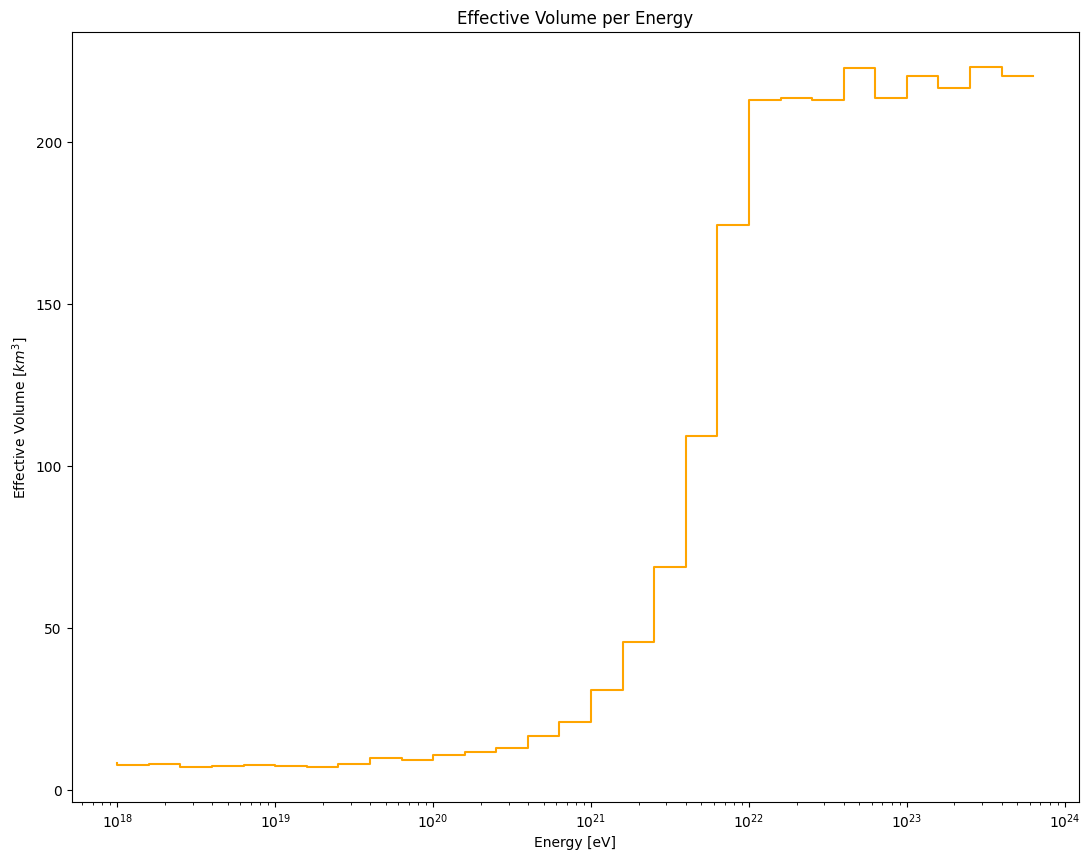

[  8.5918823    7.77284264   8.01188509   7.20992152   7.51975019
   7.83944253   7.65949555   7.20100467   8.16579565   9.98253783
   9.38746588  11.0157236   11.85483871  13.09906126  16.79533103
  21.23195659  30.89340011  45.893497    68.99755111 109.30769231
 174.34907713 213.10658579 213.63139388 213.09162944 222.84740398
 213.55363985 220.30428842 216.82435964 223.16519349 220.34902252]


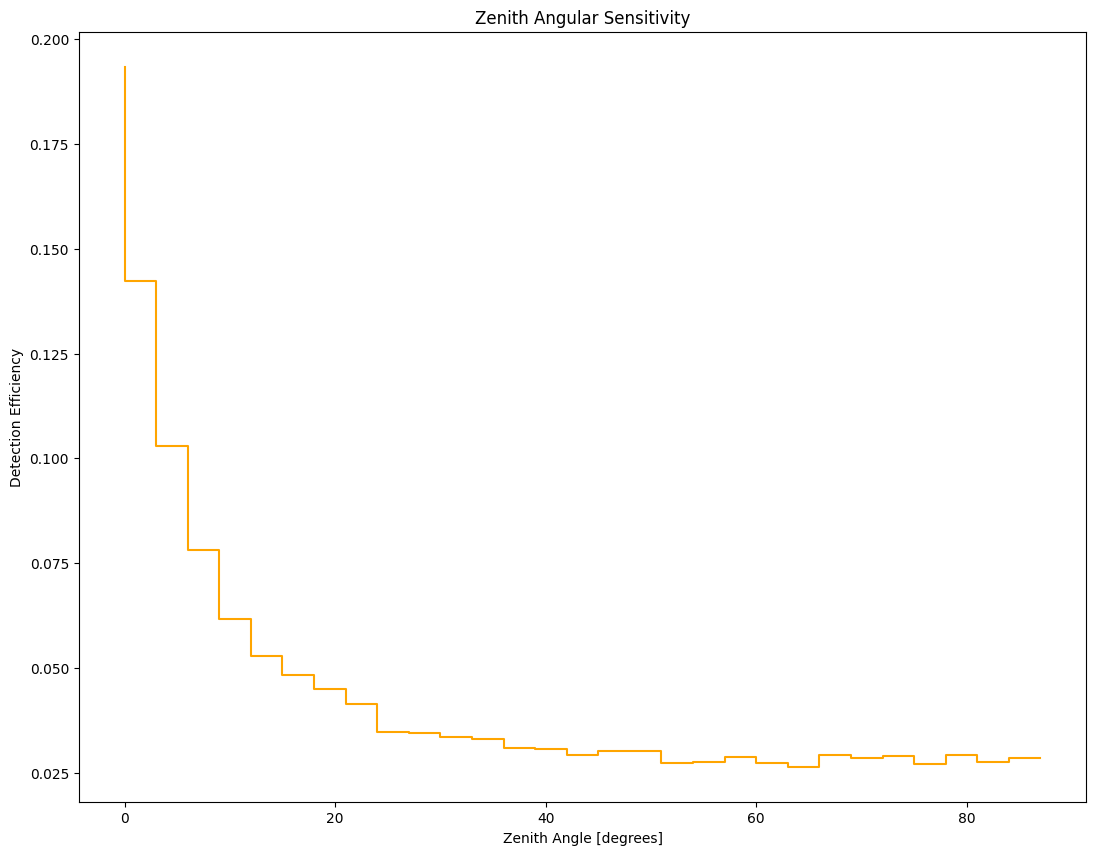

1.3892250580195646


In [144]:
log_min_energy = 18
log_max_energy = 24

# Filter out the energy values that have been detected so have flag ==1
detected_energy_T = [energy for energy, flag in zip(energy_T, flags_T) if flag == 1]

# Define the bin edges equally spaced in log space
log_bin_edges = np.linspace(log_min_energy, log_max_energy, 31)

# Transform the bin edges back to linear scale
linear_bin_edges = 10**log_bin_edges
print(linear_bin_edges)

# Plot the histogram
plt.figure(figsize=(13, 10))
plt.hist(energy_T, bins=linear_bin_edges, color='dodgerblue')
plt.hist(detected_energy_T, bins=linear_bin_edges, color='crimson')
plt.xscale('log')
plt.xlabel('Energy [eV]')
plt.ylabel('Frequency')
plt.title('Histogram of Energies')
plt.show()


# Define the bin edges equally
bin_edges_azimuth = np.linspace(np.min(azimuth_T), np.max(azimuth_T), 31)
bin_edges_zenith = np.linspace(np.min(zenith_T), np.max(zenith_T), 31)


# Filter out the azimuth and zenith values that have been detected so have flag ==1
detected_azimuth_T = [azimuth for azimuth, flag in zip(azimuth_T, flags_T) if flag == 1]
detected_zenith_T = [zenith for zenith, flag in zip(zenith_T, flags_T) if flag == 1]

# Plot the histogram
plt.figure(figsize=(13, 10))
plt.hist(azimuth_T, bins=bin_edges_azimuth, color='dodgerblue')
plt.hist(detected_azimuth_T, bins=bin_edges_azimuth, color='crimson')
plt.xlabel('Azimuth Angle [degrees]')
plt.ylabel('Frequency')
plt.title('Histogram of Azimuth Angles')
plt.show()

# Plot the histogram
plt.figure(figsize=(13, 10))
plt.hist(zenith_T, bins=bin_edges_zenith, color='dodgerblue')
plt.hist(detected_zenith_T, bins=bin_edges_zenith, color='crimson')
plt.xlabel('Zenith Angle [degrees]')
plt.ylabel('Frequency')
plt.title('Histogram of Zenith Angles')
plt.show()

# Calculate the distance between the event and the centre of the detector
x_c, y_c, z_c = zip(*location_T)
z_c = [i + 500 for i in z_c]

distance_T = [np.sqrt((x**2 + y**2 + z**2)) / 1000 for x, y, z in zip(x_c, y_c, z_c)]
detected_distance_T = [distance for distance, flag in zip(distance_T, flags_T) if flag == 1]

# determine bin edges
bin_edges_distance = np.linspace(np.min(distance_T), np.max(distance_T), 31)

# Plot the histogram
plt.figure(figsize=(13, 10))
plt.hist(distance_T, bins=bin_edges_distance, color='dodgerblue')
plt.hist(detected_distance_T, bins=bin_edges_distance, color='crimson')
plt.xlabel('Distance [km]')
plt.ylabel('Frequency')
plt.title('Histogram of Distance between Event and Detector')
plt.show()

###################################### Now try to calculate the effective volume ###############################################

# Calculate the histograms using numpy.histogram
hist_all_T, _ = np.histogram(energy_T, bins=linear_bin_edges)
hist_detected_T, _ = np.histogram(detected_energy_T, bins=linear_bin_edges)

# Ensure you avoid division by zero
division_result_T = np.divide(hist_detected_T, hist_all_T, where=hist_all_T!=0)

# Calculate the generation volume which is a square
Rgen = 17.5                        # km
Hgen = 1.5                         # km
Vgen = (2 * Rgen)**2 * Hgen
print(f"The volume of the can volume is {round(Vgen)} km3.")

# Calculate the effective volume
Veff_T = division_result_T * Vgen

# Plot the Veff
plt.figure(figsize=(13, 10))
plt.step(linear_bin_edges[:-1], Veff_T, linestyle='-', color='orange')
plt.xscale('log')
plt.xlabel('Energy [eV]')
plt.ylabel('Effective Volume [$km^3$]')
plt.title('Effective Volume per Energy')
plt.show()

print(Veff_T)

###################################### Now try to calculate the Angular Sensitivity ###########################################

# Calculate the histograms using numpy.histogram
zenith_hist_all_T, _ = np.histogram(zenith_T, bins=bin_edges_zenith)
zenith_hist_detected_T, _ = np.histogram(detected_zenith_T, bins=bin_edges_zenith)

# Ensure you avoid division by zero
zenith_division_result_T = np.divide(zenith_hist_detected_T, zenith_hist_all_T, where=zenith_hist_all_T!=0)

# Plot the Angular Dependence
plt.figure(figsize=(13, 10))
plt.step(bin_edges_zenith[:-1], zenith_division_result_T, linestyle='-', color='orange')
plt.xlabel('Zenith Angle [degrees]')
plt.ylabel('Detection Efficiency')
plt.title('Zenith Angular Sensitivity')
plt.show()

print(sum(zenith_division_result_T))

# Some Random Checks

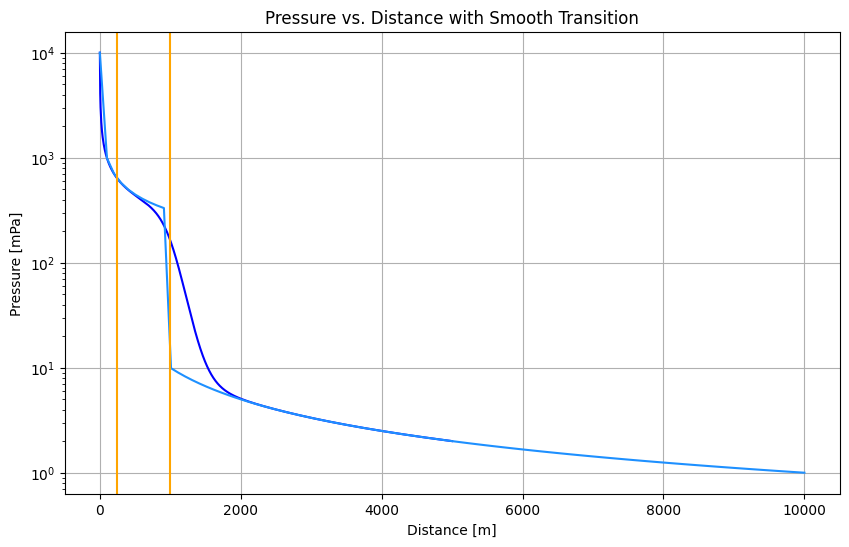

In [122]:
import numpy as np
import matplotlib.pyplot as plt

def pressure_amplitude(r):
    return np.where(r <= 1000, Por / np.sqrt(r), Por / r)

Por = 10000
# Test the function with some sample distances
distances1 = np.linspace(1, 10000, 100)
pressures1 = pressure_amplitude(distances1)

def smooth_transition(r, r_transition, Por_far, Por_near):
    """
    Compute the pressure using a smooth transition between far and near fields.
    
    Parameters:
        r (float or numpy array): Distance from the source.
        r_transition (float): Transition distance from far to near field.
        Por_far (float): Pressure amplitude in the far field.
        Por_near (float): Pressure amplitude in the near field.
        
    Returns:
        numpy array: Pressure values corresponding to the distances.
    """
    # Define the transition function
    def transition_func(r):
        return (1 - np.tanh((r - r_transition) / (r_transition / 4))) / 2
    
    # Apply the transition function
    transition = transition_func(r)
    
    # Compute the pressure using the transition
    pressure_far = Por_far / r  # Pressure in the far field
    pressure_near = Por_near / np.sqrt(r)  # Pressure in the near field
    pressure = pressure_far * (1 - transition) + pressure_near * transition
    
    return pressure

# Define parameters
r_transition = 1000  # Transition distance from far to near field
Por_far = 10000  # Pressure amplitude in the far field
Por_near = 10000  # Pressure amplitude in the near field

# Generate example distances
distances = np.linspace(1, 5000, 1000)

# Compute the pressure values for the example distances
pressures = smooth_transition(distances, r_transition, Por_far, Por_near)

# Plot distance vs. pressure
plt.figure(figsize=(10, 6))
plt.plot(distances, pressures, color='blue')
plt.plot(distances1, pressures1, color='dodgerblue')
plt.axvline(250, color='orange')
plt.axvline(1000, color='orange')
plt.yscale("log")
plt.xlabel('Distance [m]')
plt.ylabel('Pressure [mPa]')
plt.title('Pressure vs. Distance with Smooth Transition')
plt.grid(True)
plt.show()

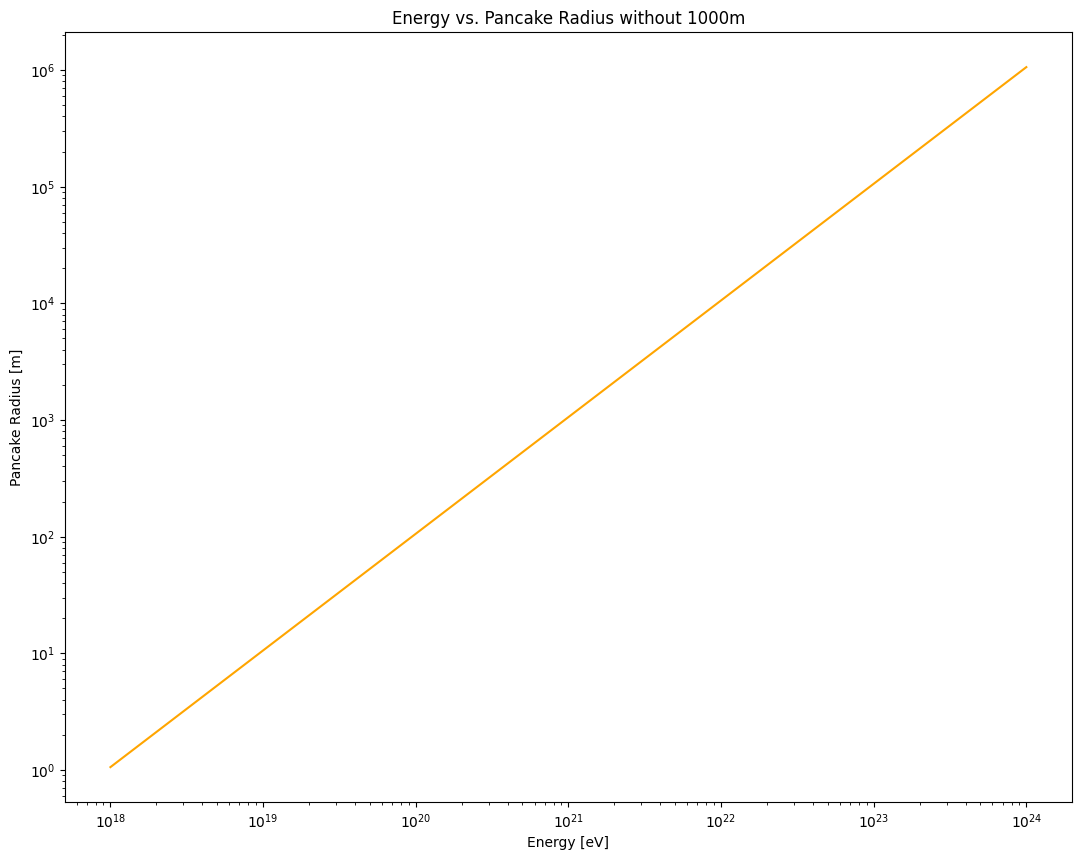

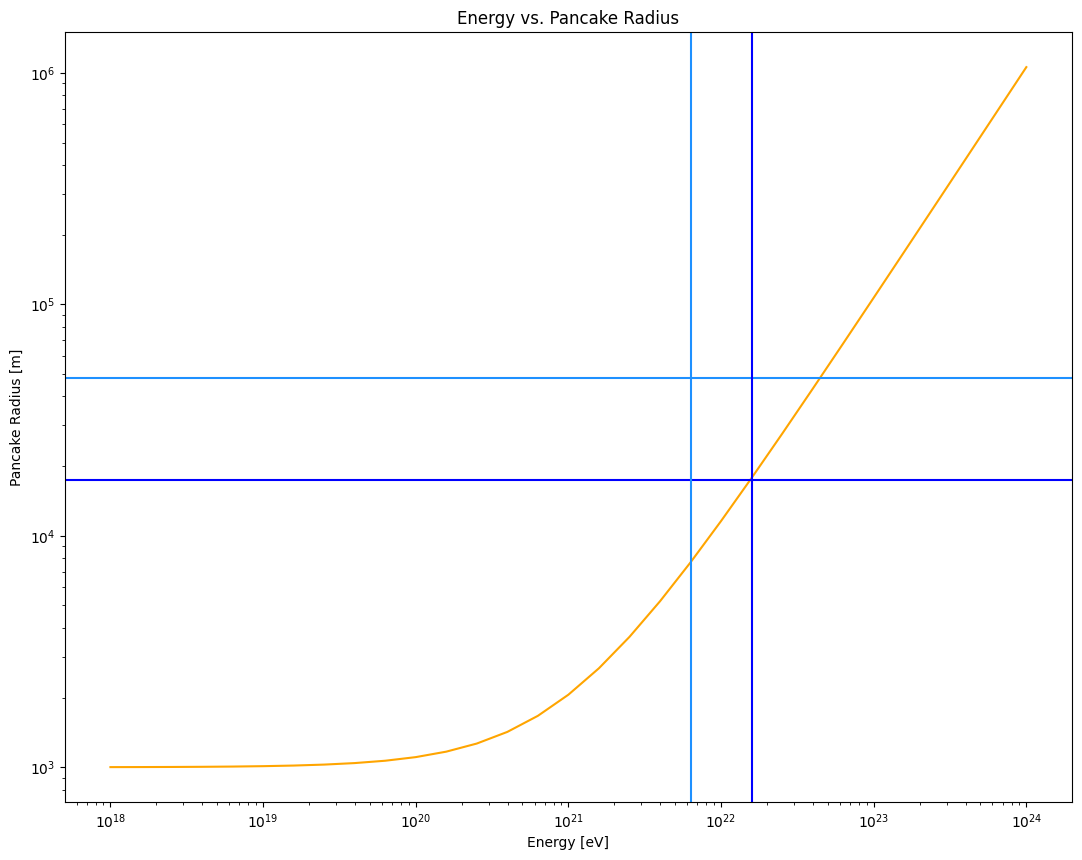

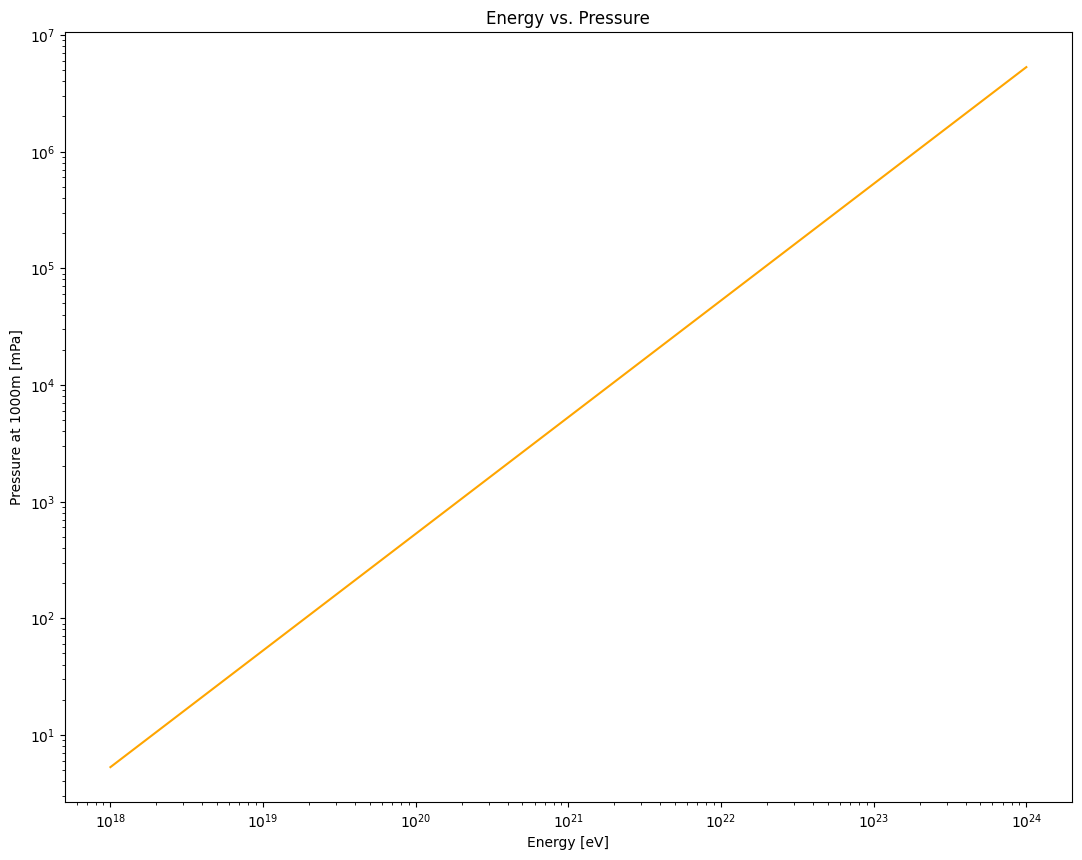

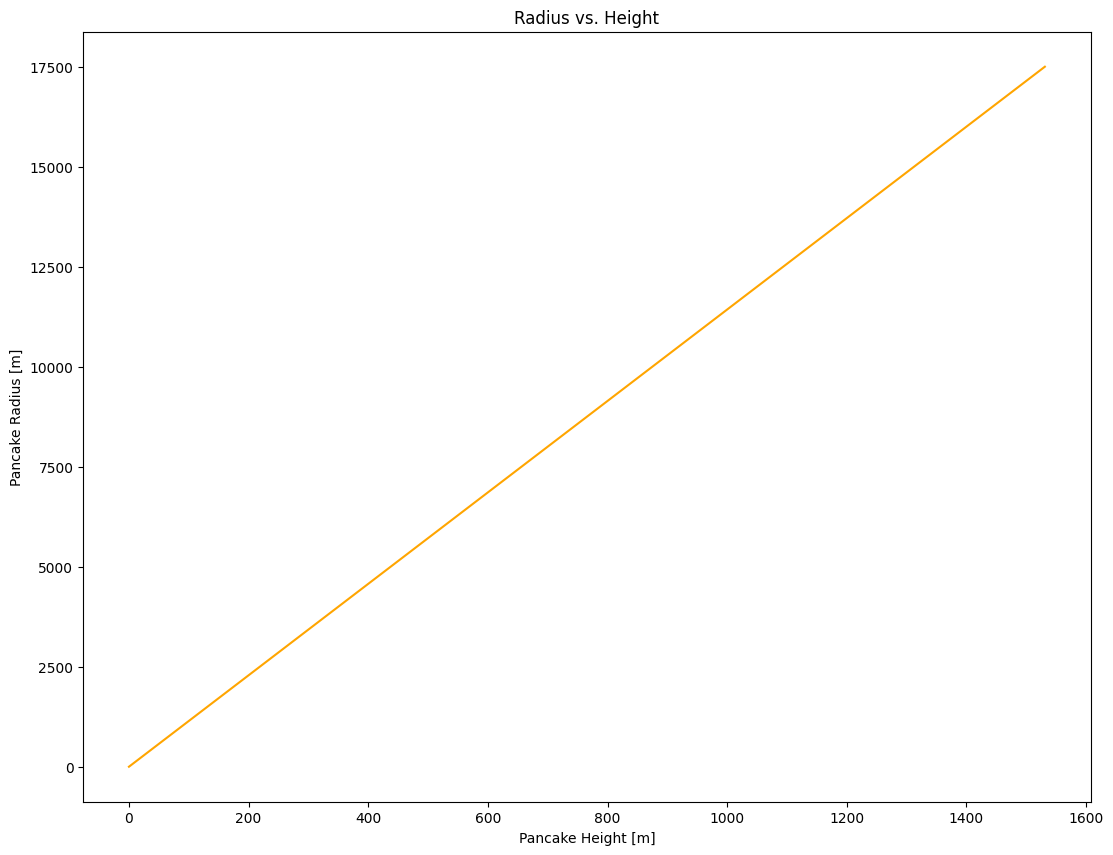

In [172]:
energies = linear_bin_edges
threshold = 5                                                                               # in mPa
radii = []
radii_1000 = []
pressures = []

for i in range(0, len(linear_bin_edges)):
    energy = linear_bin_edges[i]

    # Pressure at 1000 m Perkin
    Pressure_1000m = 0.25 * 21.15 * 10**(-18) * energy                                          # in mPa
    pressures.append(Pressure_1000m)

    radius_pancake = (Pressure_1000m / threshold)
    radius_pancake_1000 = 1000 + (Pressure_1000m / threshold)

    radii.append(radius_pancake)
    radii_1000.append(radius_pancake_1000)
    
# Plot the pancake radius
plt.figure(figsize=(13, 10))
plt.loglog(energies, radii, color='orange')
plt.xlabel('Energy [eV]')
plt.ylabel('Pancake Radius [m]')
plt.title('Energy vs. Pancake Radius without 1000m')
plt.show()

# Plot the pancake radius
plt.figure(figsize=(13, 10))
plt.loglog(energies, radii_1000, color='orange')
#plt.axhline(15000, color="blue")
plt.axhline(17500, color="blue")
plt.axhline(48000, color="dodgerblue")
plt.axvline(10**(22.2), color="blue")
plt.axvline(10**(21.8), color="dodgerblue")

plt.xlabel('Energy [eV]')
plt.ylabel('Pancake Radius [m]')
plt.title('Energy vs. Pancake Radius')
plt.show()

# Plot the pancake radius
plt.figure(figsize=(13, 10))
plt.loglog(energies, pressures, color='orange')
plt.xlabel('Energy [eV]')
plt.ylabel('Pressure at 1000m [mPa]')
plt.title('Energy vs. Pressure')
plt.show()


X = np.linspace(1, 17500)
Ys = []

for i in range(0, len(X)):
    dis = X[i]
    Y = dis * np.tan(5/180 * np.pi)
    Ys.append(Y)
    
# Plot the pancake radius
plt.figure(figsize=(13, 10))
plt.plot(Ys, X, color='orange')
plt.xlabel('Pancake Height [m]')
plt.ylabel('Pancake Radius [m]')
plt.title('Radius vs. Height')
plt.show()